Transfer learning - is a deeo learning teechnique where we use a pre-trained model. This pretrained model is trained for one task and can be retrained for a similar task with a smaller dataset.

Transfer learning gives higher accuracy compared to training models from scratch.

In [1]:
# installing the Kaggle library
!pip install kaggle

  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=11068317999938bbebfee6c2a0e0eb49f7a55683c967ca627640c1091fdbb3f9
  Stored in directory: /home/kayi/.cache/pip/wheels/46/d2/26/84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [8]:
# configuring the path of Kaggle.json file
# you have to have to use kaggle API for your registered account
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [10]:
# Download dataset using Kaggle api 
!kaggle competitions download -c dogs-vs-cats

100%|███████████████████████████████████████▉| 812M/812M [08:17<00:00, 1.69MB/s]
100%|████████████████████████████████████████| 812M/812M [08:17<00:00, 1.71MB/s]


In [11]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/Data/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [13]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [14]:
file_names = os.listdir('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/train')
print(file_names)

['cat.2263.jpg', 'dog.10673.jpg', 'dog.10913.jpg', 'cat.1279.jpg', 'cat.5398.jpg', 'cat.4712.jpg', 'cat.12368.jpg', 'cat.1765.jpg', 'dog.7545.jpg', 'dog.5650.jpg', 'dog.6875.jpg', 'dog.11766.jpg', 'dog.11597.jpg', 'cat.1028.jpg', 'cat.10608.jpg', 'cat.11127.jpg', 'dog.1486.jpg', 'dog.1059.jpg', 'cat.4912.jpg', 'cat.5771.jpg', 'dog.8189.jpg', 'dog.10019.jpg', 'dog.9512.jpg', 'cat.12321.jpg', 'cat.4610.jpg', 'cat.8134.jpg', 'cat.10045.jpg', 'cat.3813.jpg', 'dog.11404.jpg', 'cat.8187.jpg', 'dog.7942.jpg', 'dog.785.jpg', 'dog.2153.jpg', 'cat.9986.jpg', 'cat.5264.jpg', 'cat.8791.jpg', 'cat.5478.jpg', 'cat.3707.jpg', 'cat.3549.jpg', 'cat.5986.jpg', 'dog.3355.jpg', 'dog.8627.jpg', 'dog.9638.jpg', 'cat.2692.jpg', 'dog.2119.jpg', 'cat.5991.jpg', 'dog.10059.jpg', 'dog.9950.jpg', 'dog.7195.jpg', 'cat.11740.jpg', 'cat.949.jpg', 'dog.3274.jpg', 'dog.2310.jpg', 'cat.3503.jpg', 'cat.3470.jpg', 'dog.1544.jpg', 'dog.2071.jpg', 'dog.2842.jpg', 'cat.9813.jpg', 'dog.12086.jpg', 'cat.7325.jpg', 'cat.10349.

IOStream.flush timed out


In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import os

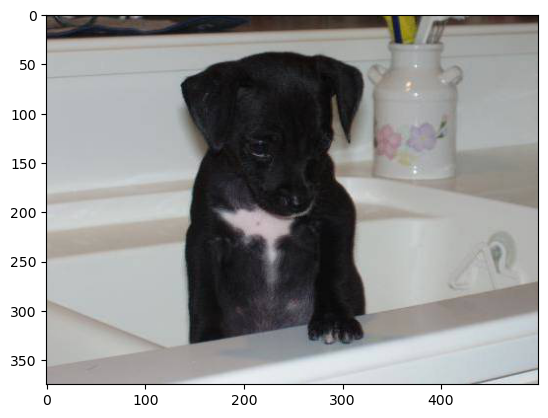

In [4]:
# display dog image
img = mpimg.imread('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

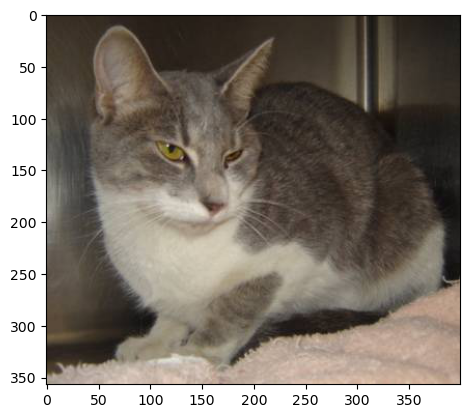

In [5]:
# display cat image
img = mpimg.imread('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [3]:

file_names = os.listdir('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])



cat
dog
dog
cat
cat


In [9]:
file_names = os.listdir('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/train/')

dog_count = 0
cat_count = 0

for i in file_names:

  name = i[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [10]:
#creating a directory for resized images
os.mkdir('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/image resized')

In [11]:

original_folder = '/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/train/'
resized_folder = '/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/image resized/'

for i in range (2000):
    filename = os.listdir(original_folder)[i]
    img_path = original_folder + filename

    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')

    newImgPath = resized_folder + filename
    img.save(newImgPath)


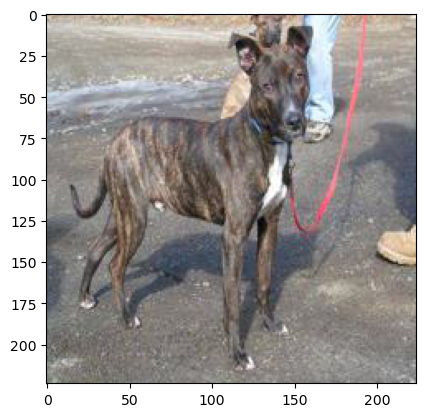

In [16]:
# display resized dog image
img = mpimg.imread('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/image resized/dog.1083.jpg')
imgplt = plt.imshow(img)
plt.show()

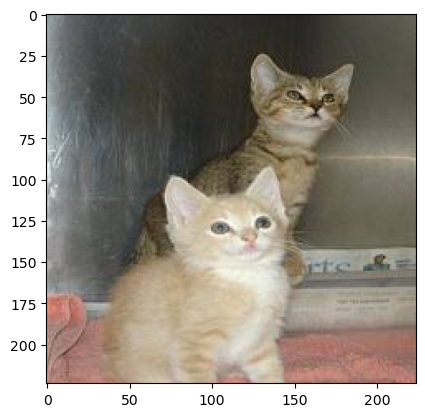

In [14]:
# display resized cat image
img = mpimg.imread('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/image resized/cat.27.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [7]:
# creating a for loop to assign labels
filenames = os.listdir('/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [8]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1025  975]


Converting all the resized images to numpy arrays

In [9]:
import cv2
import glob

In [10]:
image_dir = '/home/kayi/Desktop/ML_projects/Dog Cat classificaction using transfer learning/image resized/'
image_ext = ['png','jpg'] # required extensions

files = []#initiating empty list


[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_ext]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])




In [11]:
dog_cat_images

array([[[[155, 195, 213],
         [153, 193, 211],
         [162, 198, 214],
         ...,
         [ 42,  52,  76],
         [ 35,  43,  66],
         [ 29,  37,  60]],

        [[170, 206, 222],
         [167, 203, 219],
         [170, 204, 220],
         ...,
         [ 40,  50,  74],
         [ 35,  43,  66],
         [ 29,  37,  60]],

        [[180, 211, 226],
         [176, 208, 221],
         [177, 206, 220],
         ...,
         [ 36,  46,  70],
         [ 30,  38,  61],
         [ 24,  32,  55]],

        ...,

        [[211, 227, 239],
         [210, 229, 237],
         [211, 227, 239],
         ...,
         [ 24,  35,  62],
         [ 22,  30,  59],
         [ 22,  30,  59]],

        [[209, 226, 239],
         [207, 227, 238],
         [209, 226, 239],
         ...,
         [ 23,  34,  61],
         [ 22,  30,  59],
         [ 20,  28,  57]],

        [[207, 226, 239],
         [207, 226, 239],
         [207, 226, 239],
         ...,
         [ 24,  35,  62],
        

In [12]:
type(dog_cat_images)

numpy.ndarray

In [14]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [15]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
X.shape, X_train.shape, X_test.shape

((2000, 224, 224, 3), (1600, 224, 224, 3), (400, 224, 224, 3))

In [18]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [19]:
X_train_scaled

array([[[[0.67058824, 0.70588235, 0.74509804],
         [0.67058824, 0.70588235, 0.74509804],
         [0.67058824, 0.70588235, 0.74509804],
         ...,
         [0.91372549, 0.97254902, 0.94117647],
         [0.89019608, 0.94901961, 0.91764706],
         [0.87058824, 0.92941176, 0.89803922]],

        [[0.66666667, 0.70196078, 0.74117647],
         [0.66666667, 0.70196078, 0.7372549 ],
         [0.67058824, 0.70588235, 0.74509804],
         ...,
         [0.84705882, 0.90588235, 0.8745098 ],
         [0.85490196, 0.91372549, 0.88235294],
         [0.87058824, 0.92941176, 0.89803922]],

        [[0.66666667, 0.70196078, 0.7372549 ],
         [0.66666667, 0.70588235, 0.73333333],
         [0.66666667, 0.70196078, 0.7372549 ],
         ...,
         [0.83921569, 0.88627451, 0.8627451 ],
         [0.85882353, 0.90980392, 0.87843137],
         [0.8745098 , 0.9254902 , 0.89411765]],

        ...,

        [[0.90196078, 0.90588235, 0.89019608],
         [0.89803922, 0.90196078, 0.88627451]

**Building the Neural Network**

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

2024-11-12 06:08:38.370830: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
num_of_classes = 2

model = tf.keras.Sequential([
    #
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7f71c8241eb0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')